### 파이썬에서 파일을 읽고 쓰기
- 파이썬 내장함수 open() 사용
    - f.open() ~ f.close()
- with문 사용
    - with open() as f:
        f.write()

### pickle
- 파이썬에서 리스트, 튜플 등의 자료구조 형태를 유지하면서 파일로 저장, 불러올 때 사용하는 모듈
- 규칙이 있는 데이터의 형식을 유지하면서 데이터를 저장
- 바이너리 형태로 저장 (저장용량이 다른 파일구조에 비해 작다)
- 불러올때 : rd(read binary), 저장할때 : wb(write binary)

### 네이버 영화 리뷰 데이터 분석하기

In [8]:
import pickle

In [10]:
# with문을 사용하여 파일을 불러오기
with open('movie_review.pkl', 'rb') as f:
    movie = pickle.load(f)
movie[:5] # 데이터확인
# 0 : 영화에 대한 평가
# 1 : 영화에 대한 감성평가 - 0: 부정, 1:긍정

[['아 더빙.. 진짜 짜증나네요 목소리', 0],
 ['흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', 1],
 ['너무재밓었다그래서보는것을추천한다', 0],
 ['교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', 0],
 ['사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', 1]]

In [11]:
# 전체 리뷰데이터 수(개수) 확인하기
# len() 사용해서 리뷰의 개수 구하기
len(movie)

5000

In [32]:
# 전체 리뷰 길이의 평균값을 구해보자
# 0번 인덱스의 리뷰의 길이
summ1 = 0
for i in movie:
    summ1 += len(i[0])
mean = summ1 /len(movie)
print(summ1)
print(f"리뷰의 평균 길이: {mean}")

177433
리뷰의 평균 길이: 35.4866


In [87]:
# 긍정 / 부정 리뷰의 개수를 구해보자
# 긍정 / 부정 리뷰 데이터에 접근(인덱싱)
summ2 = 0
summ3 = 0
for i in movie:
    if i[1] == 0:
        summ2 +=1
    else:
        summ3 +=1
print(f"부정 리뷰의 수{summ2}")
print(f"긍정 리뷰의 수{summ3}")

부정 리뷰의 수2501
긍정 리뷰의 수2499


In [96]:
length = []

for i in movie:
    length.append(len(i[0]))
#length
max_num = max(length)
min_num = min(length)
print(f"최대 길이 : {max_num}")
print(f"최소 길이 : {min_num}")

최대 길이 : 144
최소 길이 : 1


In [104]:
# 리뷰 최대 길이 값을 이용하여 리뷰 내용 가져오기
for i in movie:
    if max_num == len(i[0]):
        xx = i[0]
print(f"리뷰의 최대 길이는 '{max_num}'입니다.\n리뷰 내용 : {xx}")

리뷰의 최대 길이는 '144'입니다.
리뷰 내용 : "상처투성이인 한국인을 위하여 어제는 추기경님이 계셨고 오늘은 교황님께서 치유하시고 가셨습니다. "" 고난이 나를 찾을때 피하고 싶은 내마음은""하시며 노래부르실때는 한 인간으로서 사제로서 격었을 그분의 고난에 눈물이 흐릅니다. 이땅에 이런어른 더안계시나요"


In [ ]:
# 리뷰 최소 길이 값을 이용하여 리뷰 내용 가져오기

In [123]:
siz = []

for i in movie:
    if min_num == len(i[0]):
        siz.append(i[0])
print(f"리뷰의 최소 길이는 '{min_num}' 갯수는 {len(siz)} 입니다.\n리뷰내용 : {siz[:]}입니다.")

리뷰의 최소 길이는 '1' 갯수는 19 입니다.
리뷰내용 : ['아', '잼', '1', '4', '4', '굿', '짱', '휴', '.', '1', '굿', '음', '?', '?', 'ㅎ', '굿', 'ㅋ', '굿', '즐']입니다.


In [125]:
#'ㅋ'가 포함된 리뷰 개수
tt = 0
for i in movie:
    if 'ㅋ' in i[0]:
        tt +=1
print(f"'ㅋ'가 포함된 리뷰의 갯수는 {tt} 입니다.")        

'ㅋ'가 포함된 리뷰의 갯수는 328 입니다.


In [131]:
# 검색할 데이터입력 >> 포함된 리뷰의 개수 구하기
ttt = input("검색할 데이터 입력 >> ")
tt_t = 0
for i in movie:
    if ttt in i[0]:
        tt_t +=1
print(f"'{ttt}'가 포함된 리뷰의 갯수는 {tt_t} 입니다.")  

검색할 데이터 입력 >> ?
'?'가 포함된 리뷰의 갯수는 404 입니다.


In [ ]:
# 부정인 리뷰중 최대 길이를 구하고, 그 리뷰 내용 가져오기

In [135]:
max_neg = len(movie[0])
neg_content = ""
for i in movie:
    if i[1] == 0:
        if max_neg < len(i[0]):
            max_neg = len(i[0])
            neg_content = i[0]
        
print(f"부정 리뷰중 최대 리뷰 길이는 {max_neg} 입니다. \n리뷰내용 : {neg_content}")

부정 리뷰중 최대 리뷰 길이는 140 입니다. 
리뷰내용 : 평점조절위원회에서 나왔습니다(웃음)김혜선은 @내일이 오면@의 김순정,순정이 역할이 제일이다.팜므파탈로써,그 정도까지 잘해낼 줄은,정말 의외였어...연기20년 한사람에게 요즘 사극에서 벌어지고 있는,그녀에 대한 연기논란은 왠지 코미디의한장면 같음(웃음)


### 멜론차트 top100 활용해서 데이터를 분석해보고 나만의 차트를 만들기

In [243]:
# 멜론차트 데이터를 불러와서 데이터 확인해보기
# with문 사용해서 데이터 불러오기
with open("music_100.pkl", 'rb') as ff:
    music1 = pickle.load(ff)


In [244]:
music1[:]

[[1, '사건의 지평선', '윤하 (YOUNHA)'],
 [2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'],
 [3, 'Hype boy', 'NewJeans'],
 [4, 'Nxde', '(여자)아이들'],
 [5, 'After LIKE', 'IVE (아이브)'],
 [6, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)'],
 [7, '사랑은 늘 도망가', '임영웅'],
 [8, 'Attention', 'NewJeans'],
 [9, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'],
 [10, 'LOVE DIVE', 'IVE (아이브)'],
 [11, '우리들의 블루스', '임영웅'],
 [12, 'Monologue', '테이'],
 [13, 'Shut Down', 'BLACKPINK'],
 [14, '다시 만날 수 있을까', '임영웅'],
 [15, 'London Boy', '임영웅'],
 [16, 'Pink Venom', 'BLACKPINK'],
 [17, '무지개', '임영웅'],
 [18, 'Polaroid', '임영웅'],
 [19, '이제 나만 믿어요', '임영웅'],
 [20, '자격지심 (Feat. ZICO)', "BE'O (비오)"],
 [21, '아버지', '임영웅'],
 [22, 'A bientot', '임영웅'],
 [23, '해요 (2022)', '#안녕'],
 [24, '손이 참 곱던 그대', '임영웅'],
 [25, '인생찬가', '임영웅'],
 [26, '딱 10CM만', '10CM, BIG Naughty (서동현)'],
 [27, 'TOMBOY', '(여자)아이들'],
 [28, '사랑해 진짜', '임영웅'],
 [29, '그때 그 순간 그대로 (그그그)', 'WSG워너비 (가야G)'],
 [30, '사랑인가 봐', '멜로망스'],
 [31, '연애편지', '임영웅'],
 [32, '내가 아니라도', '주호'],
 [33, '너의 모든 순간', '

In [245]:
# 슬라이싱 : 82위 ~ 98위 차트 출력해보기
music1[81:98]

[[82, '신호등', '이무진'],
 [83, '스티커 사진', '21학번'],
 [84, 'strawberry moon', '아이유'],
 [85, 'Santa Tell Me', 'Ariana Grande'],
 [86, 'WHEN I MOVE', '카라'],
 [87, '회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)', 'sokodomo'],
 [88, '그래서 그대는', '이영현'],
 [89, 'MY BAG', '(여자)아이들'],
 [90, 'Next Level', 'aespa'],
 [91, '그중에 그대를 만나', '김호중'],
 [92, "바보에게 바보가 (웹툰 '연애의 발견' X 이석훈)", '이석훈'],
 [93, '통화연결음', '보라미유, MJ (써니사이드)'],
 [94, '오르트구름', '윤하 (YOUNHA)'],
 [95, 'Cheshire', 'ITZY (있지)'],
 [96, '늦은 밤 헤어지긴 너무 아쉬워', '케이시 (Kassy)'],
 [97, '모든 계절은 너였다', '길구봉구'],
 [98, '나의 목소리로', '김호중']]

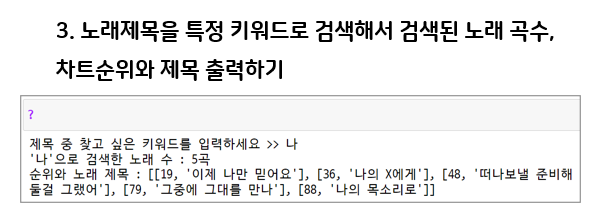

In [247]:
input_text = input("제목 중 찾고 싶은 키워드를 입력하세요 >> ")
textlist = []
text_cont = 0
for i in music1:
    if input_text in i[1]:
        text_cont += 1
        textlist.append([i[0],i[1]])
print(f"{input_text}으로 검색한 노래수 : {text_cont}곡 \n 순위와 노래 제목 : {textlist} ")

제목 중 찾고 싶은 키워드를 입력하세요 >> 나
나으로 검색한 노래수 : 5곡 
 순위와 노래 제목 : [[19, '이제 나만 믿어요'], [43, '나의 X에게'], [45, '떠나보낼 준비해 둘걸 그랬어'], [91, '그중에 그대를 만나'], [98, '나의 목소리로']] 


In [248]:
siger = input("가수명을 입력하세요 >> ")
song = []
for i in music1:
    if siger in i[2]:
        song.append(i[1])
print(f"{siger}가 부른 노래는 {song}")

가수명을 입력하세요 >> 아이유
아이유가 부른 노래는 ['내 손을 잡아', '드라마', 'strawberry moon']


In [ ]:
# 1위 곡을 삭제하고 나의 최애곡을 1위곡으로 만들기
# 1. 1위곡 삭제 del

# 2. 삭제 확인

# 3. 나의 최애곡을 1위곡으로 추가하기 append

# 4. 추가 확인 후 정렬

# 5. 순위대로 출력해보기 : 1 ~ 10

In [249]:
del(music1[0])

In [254]:
music1[:10]

[[1, '사이렌', '호미들'],
 [2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'],
 [3, 'Hype boy', 'NewJeans'],
 [4, 'Nxde', '(여자)아이들'],
 [5, 'After LIKE', 'IVE (아이브)'],
 [6, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)'],
 [7, '사랑은 늘 도망가', '임영웅'],
 [8, 'Attention', 'NewJeans'],
 [9, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'],
 [10, 'LOVE DIVE', 'IVE (아이브)']]

In [251]:
music1.append([1,"사이렌","호미들"])


In [231]:
music1[99][0]

1

In [253]:
music1.sort()

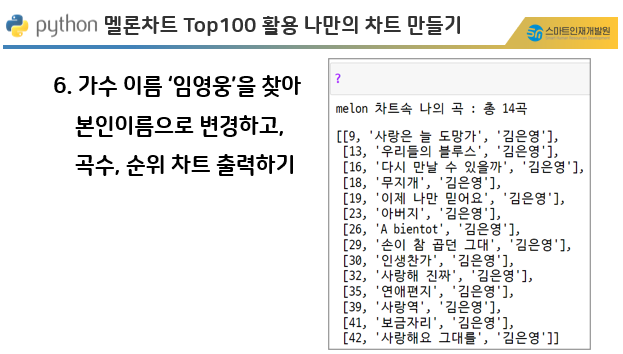

In [268]:
name = '김시우'
cnt = 0
my_song = []
for i in music1:
    
    if '김시우' == i[2]:
        i[2] = name
        my_song.append([i[0],i[1],i[2]])
        cnt +=1
print(f"melon 차트 속 나의 노래 : 총 {cnt}곡")
print(f"나의 노래들 : {my_song}")

melon 차트 속 나의 노래 : 총 14곡
나의 노래들 : [[7, '사랑은 늘 도망가', '김시우'], [11, '우리들의 블루스', '김시우'], [14, '다시 만날 수 있을까', '김시우'], [15, 'London Boy', '김시우'], [17, '무지개', '김시우'], [18, 'Polaroid', '김시우'], [19, '이제 나만 믿어요', '김시우'], [21, '아버지', '김시우'], [22, 'A bientot', '김시우'], [24, '손이 참 곱던 그대', '김시우'], [25, '인생찬가', '김시우'], [28, '사랑해 진짜', '김시우'], [31, '연애편지', '김시우'], [39, '보금자리', '김시우']]


In [257]:
siger = input("가수명을 입력하세요 >> ")
song = []
for i in music1:
    if siger in i[2]:
        song.append(i[1])
print(f"{siger}가 부른 노래는 {song}")

가수명을 입력하세요 >> 김시우
김시우가 부른 노래는 ['사랑은 늘 도망가']


In [269]:
# 내가 만든 나만의 멜론차트를 파일로 저장하기
with open('my_melon.pkl', 'wb') as f:
    pickle.dump(music1,f)

In [272]:
# 불러오기
with open('my_melon.pkl', 'rb') as f:
    m = pickle.load(f)
m[:15]

[[1, '사이렌', '호미들'],
 [2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'],
 [3, 'Hype boy', 'NewJeans'],
 [4, 'Nxde', '(여자)아이들'],
 [5, 'After LIKE', 'IVE (아이브)'],
 [6, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)'],
 [7, '사랑은 늘 도망가', '김시우'],
 [8, 'Attention', 'NewJeans'],
 [9, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'],
 [10, 'LOVE DIVE', 'IVE (아이브)'],
 [11, '우리들의 블루스', '김시우'],
 [12, 'Monologue', '테이'],
 [13, 'Shut Down', 'BLACKPINK'],
 [14, '다시 만날 수 있을까', '김시우'],
 [15, 'London Boy', '김시우']]